In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set paths to directories
train_dir = '/Users/vinuthnarajeswari/Desktop/archive/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/Users/vinuthnarajeswari/Desktop/archive/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/Users/vinuthnarajeswari/Desktop/archive/test'

# Set global parameters
image_size = (128, 128)
batch_size = 32

In [2]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 70294 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 419 images belonging to 38 classes.


In [5]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# Plot training accuracy and loss
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=5,              # Stop training after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best weights when stopping
)

# Define model checkpoint callback
checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save the model in Keras format
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Fit the model and save history
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

# Confirm the keys in history
print(history.history.keys())

import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
import pickle
with open('training_history.pkl', 'rb') as f:
    history_data = pickle.load(f)
plt.figure(figsize=(12, 4))




Epoch 1/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 77ms/step - accuracy: 0.2397 - loss: 2.8581 - val_accuracy: 0.5999 - val_loss: 1.5889
Epoch 2/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 188s 85ms/step - accuracy: 0.4919 - loss: 2.1647 - val_accuracy: 0.5835 - val_loss: 2.3622
Epoch 3/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.5395 - loss: 2.6857 - val_accuracy: 0.6583 - val_loss: 2.6295
Epoch 4/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 84ms/step - accuracy: 0.5789 - loss: 3.6599 - val_accuracy: 0.7112 - val_loss: 3.9522
Epoch 5/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 86ms/step - accuracy: 0.5994 - loss: 5.9162 - val_accuracy: 0.7301 - val_loss: 5.9380
Epoch 6/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 87ms/step - accuracy: 0.6284 - loss: 8.3028 - val_accuracy: 0.7726 - val_loss: 7.1294
Epoch 7/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 189s 86ms/step - accuracy: 0.6492 - loss: 11.7417 - val_accuracy: 0.7643 - val_loss: 10.0098
Epoch 8/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 87ms/step - accuracy

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8956 - loss: 35.6567
Test Accuracy: 0.88


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.57      0.73         7
                                 Apple___Black_rot       0.86      1.00      0.92        12
                          Apple___Cedar_apple_rust       1.00      0.82      0.90        11
                                   Apple___healthy       0.60      1.00      0.75         9
                               Blueberry___healthy       1.00      0.91      0.95        11
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00        11
                 Cherry_(including_sour)___healthy       1.00      0.90      0.95        10
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      1.00      0.89        12
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00         8
               Co

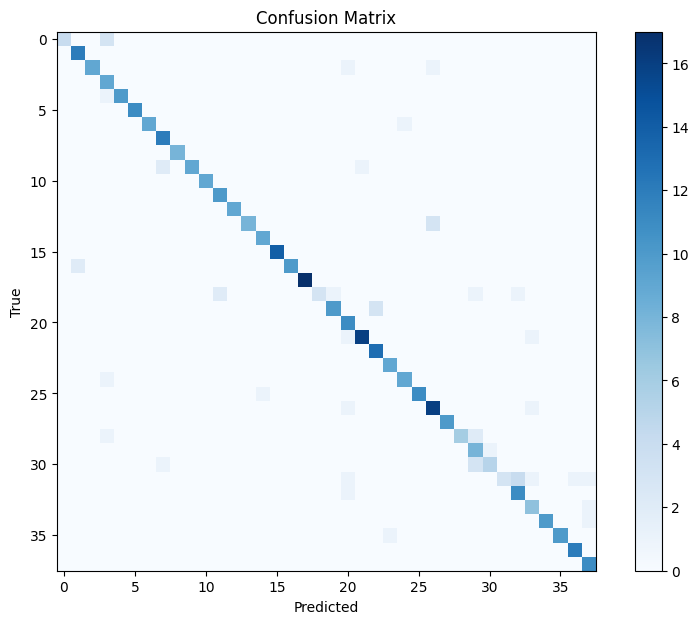

In [9]:
# Predict on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)

# Generate classification report
print("Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Generate and visualize confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


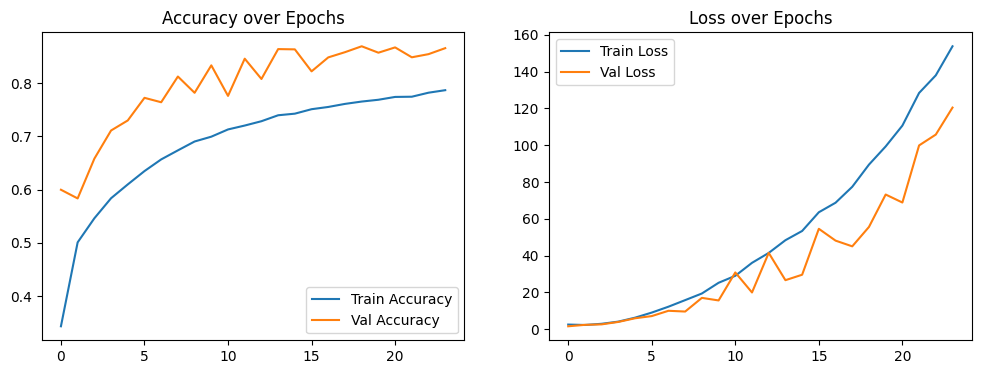

In [10]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


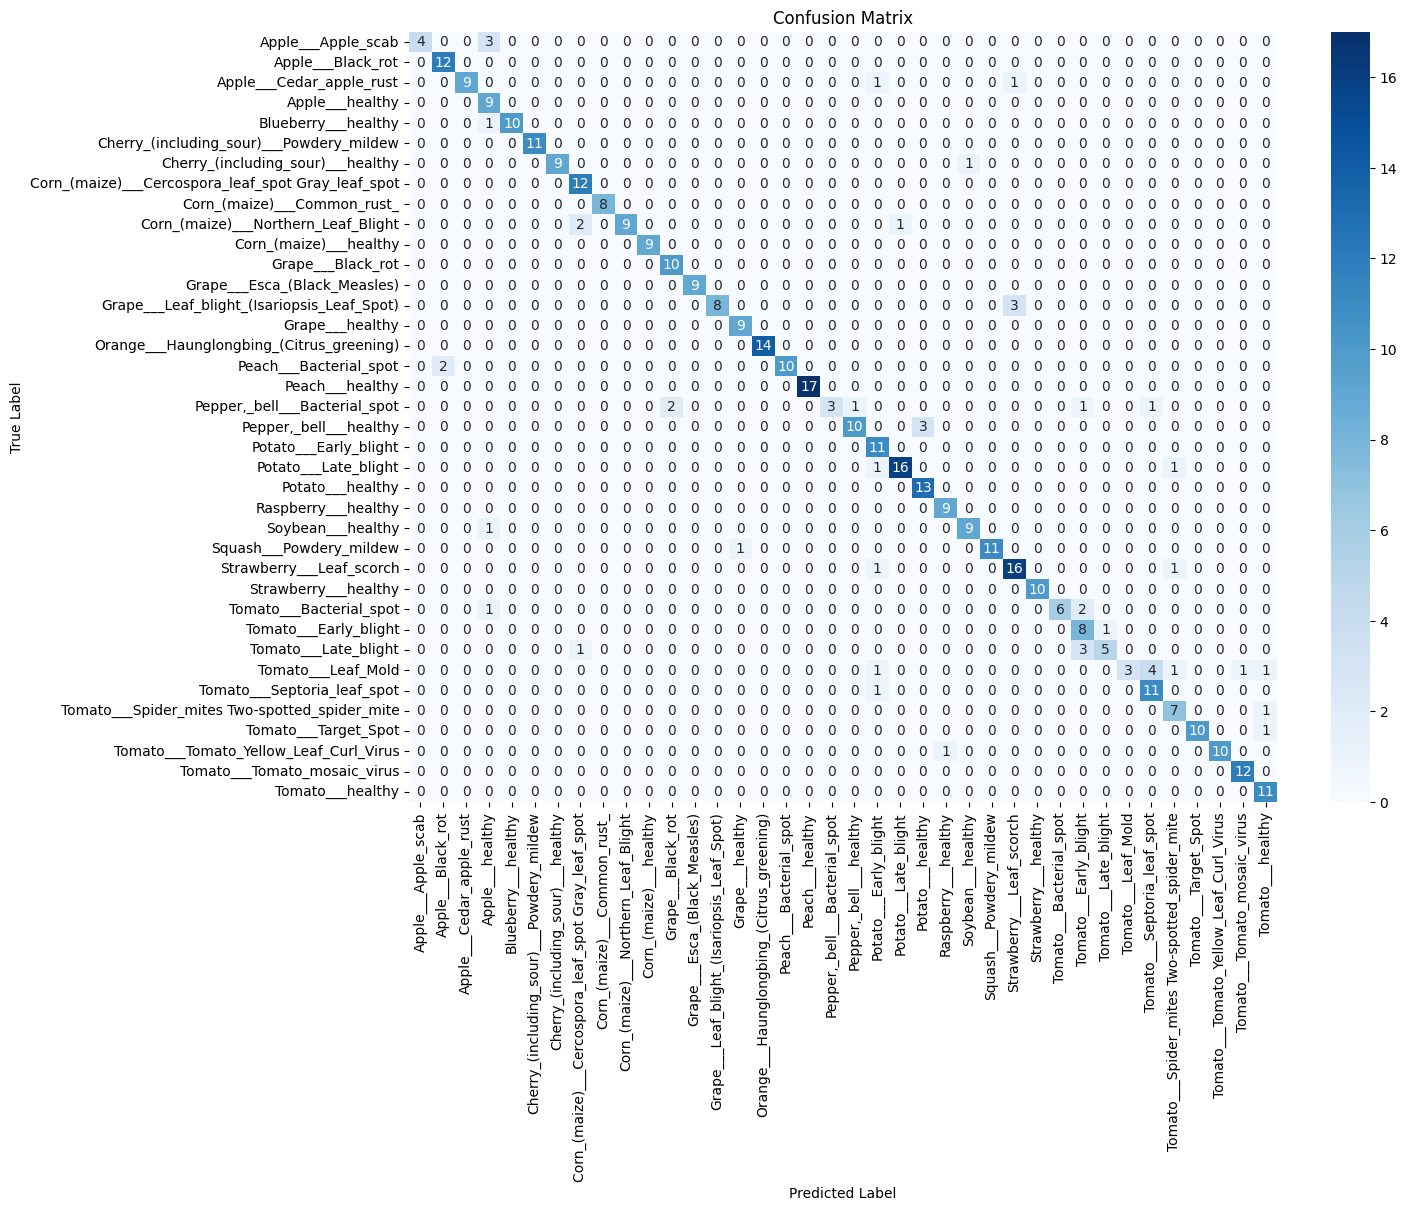

In [11]:
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [13]:
# Save the model (if not done already)
model.save("disease_model.h5")

# Load the model
from tensorflow.keras.models import load_model
disease_model = load_model("disease_model.h5")



In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace this with the actual labels used during training
disease_labels = train_generator.class_indices
disease_labels = {v: k for k, v in disease_labels.items()}  # Reverse mapping

def predict_disease(img_path):
    """
    Predict the disease from the input image.
    Args:
        img_path (str): Path to the input image.
    Returns:
        str: Predicted disease name or error message.
    """
    try:
        # Load and preprocess the image to match model input size
        img = image.load_img(img_path, target_size=(128, 128))  # Update to (128, 128)
        img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Return the disease name
        return disease_labels[predicted_class]

    except Exception as e:
        return f"Error: {str(e)}"

# Example usage
result = predict_disease("/Users/vinuthnarajeswari/Desktop/test_img.jpg")
print("Predicted Disease:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Disease: Tomato___Early_blight
